# Анализ временных рядов

## 1. Проанализируйте тенденцию создания сделок с течением времени и их связь с звонками.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

deals_df = pd.read_pickle("deals_cleaned_v3.pkl")

deals_df.set_index('Created Time', inplace=True)
# deals_df.sort_index(inplace=True)
deals_df.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range
Created Time,,,,,,,,,,,,,,,,,,,,,
2024-06-21 15:30:00,5805028000056864695,Ben Hall,NaT,B - Medium,New Lead,NaN,/eng/test,03.07.23women,NaT,v16,...,NaN,<NA>,NaN,NaN,5805028000056849495,NaN,NaN,2024-06-21,NaN,NaN
2024-06-21 15:23:00,5805028000056859489,Ulysses Adams,NaT,B - Medium,New Lead,NaN,/at-eng,NaN,NaT,NaN,...,6,<NA>,0.0,2000.0,5805028000056834471,NaN,NaN,2024-06-21,NaN,NaN
2024-06-21 14:45:00,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,0 days 00:26:43,b1-at,...,NaN,<NA>,NaN,NaN,5805028000056854421,NaN,NaN,2024-06-21,0.0,Medium (15-30 min)
2024-06-21 13:32:00,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,0 days 01:00:04,bloggersvideo14com,...,NaN,<NA>,NaN,NaN,5805028000056889351,NaN,NaN,2024-06-21,0.0,Very slow (>60 min)
2024-06-21 13:21:00,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,0 days 00:53:12,website,...,NaN,<NA>,NaN,NaN,5805028000056876176,NaN,NaN,2024-06-21,0.0,Slow (30-60 min)


In [19]:
# 1. Отсортировать по времени
deals_df.sort_index(inplace=True)

In [20]:
# Проверим результат
print(deals_df.index[:5])
print(deals_df.index[-5:])

DatetimeIndex(['2023-07-03 17:03:00', '2023-07-03 20:17:00',
               '2023-07-03 20:39:00', '2023-07-04 07:10:00',
               '2023-07-04 07:10:00'],
              dtype='datetime64[ns]', name='Created Time', freq=None)
DatetimeIndex(['2024-06-21 13:21:00', '2024-06-21 13:32:00',
               '2024-06-21 14:45:00', '2024-06-21 15:23:00',
               '2024-06-21 15:30:00'],
              dtype='datetime64[ns]', name='Created Time', freq=None)


In [16]:
print(deals_df_sorted._is_copy)

None


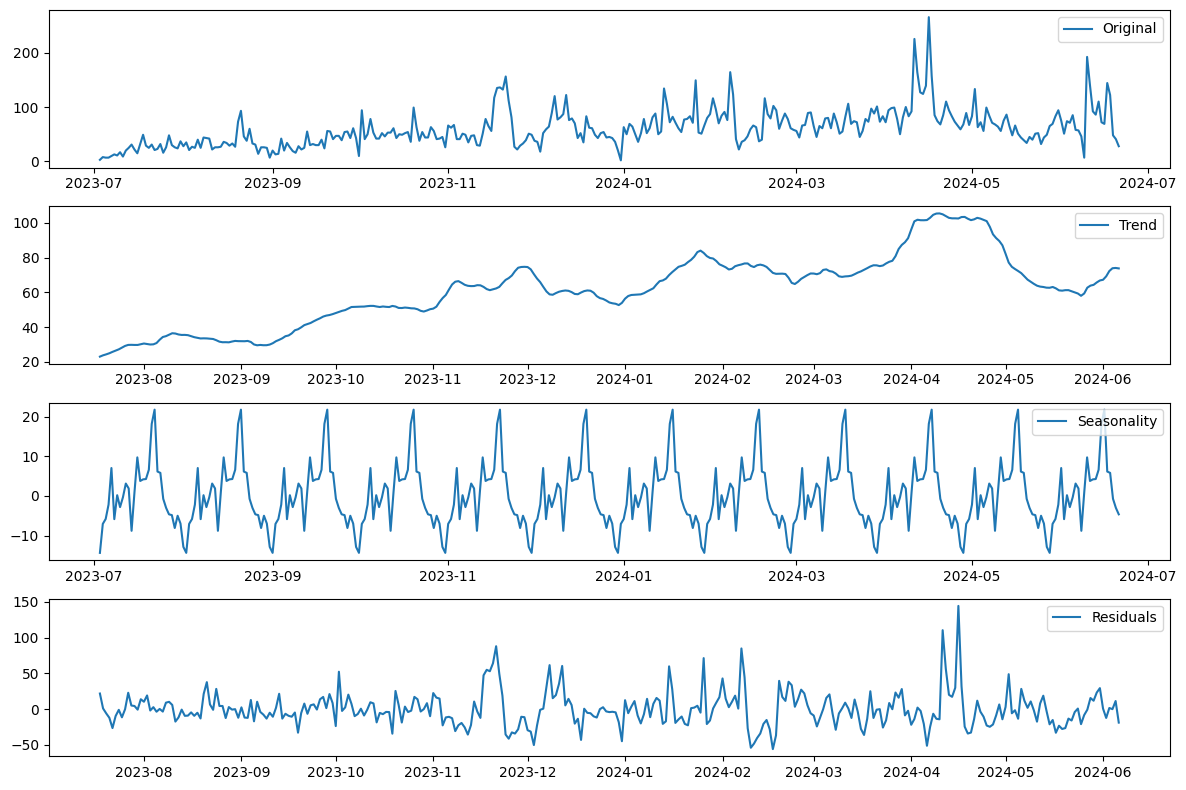

In [30]:
# 2. Агрегируем: считаем количество сделок в каждый день
daily_deals = deals_df.resample("D").size()  # временной ряд по дням
# 3. Разложение временного ряда (период — 7, если думаем, что есть недельная сезонность)
decomposition = seasonal_decompose(daily_deals, model='additive', period=30)

# 4. Извлекаем компоненты
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 5. Визуализация (как в твоём учебном примере)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_deals, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [37]:
# Фильтруем только успешные сделки
successful_df = deals_df[deals_df['Stage'] == 'Payment Done']
successful_df

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range
Created Time,,,,,,,,,,,,,,,,,,,,,
2023-07-04 10:11:00,5805028000000947046,Oliver Taylor,2023-07-12,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_DE,71 days 00:46:22,b3,...,11,11,1000.0,11000.0,5805028000000939010,Hamburg,NaN,2023-07-04,8.0,Very slow (>60 min)
2023-07-08 08:56:00,5805028000001401001,Oliver Taylor,2023-07-16,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_DE,0 days 02:22:36,b3,...,11,8,1000.0,11500.0,5805028000001350049,NaN,NaN,2023-07-08,8.0,Very slow (>60 min)
2023-07-15 13:27:00,5805028000001885076,Jane Smith,2023-08-31,A - High,Payment Done,NaN,eng/digital-marketing,04.07.23recentlymoved_DE,0 days 00:13:31,b2,...,11,11,450.0,4000.0,5805028000001880249,Ingolstadt,NaN,2023-07-15,47.0,Fast (5-15 min)
2023-07-17 18:02:00,5805028000001987082,Julia Nelson,2023-07-17,C - Low,Payment Done,Conditions are not suitable,eng/digital-marketing,12.07.2023wide_DE,0 days 00:49:16,v3com,...,11,11,1000.0,11000.0,5805028000001986077,NaN,B1,2023-07-17,0.0,Slow (30-60 min)
2023-07-18 21:11:00,5805028000002302112,Julia Nelson,2023-07-19,C - Low,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,0 days 15:24:52,_{region_name}_,...,6,2,1000.0,5000.0,5805028000002302109,Wolfsburg,B1,2023-07-18,1.0,Very slow (>60 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10 15:33:00,5805028000054257317,Quincy Vincent,2024-06-17,B - Medium,Payment Done,NaN,/eng,02.07.23wide_DE,0 days 00:45:55,bloggersvideo16com,...,11,1,1000.0,11000.0,5805028000054284461,Leinfelden-Echterdingen,B1,2024-06-10,7.0,Slow (30-60 min)
2024-06-11 19:39:00,5805028000054664018,Ben Hall,2024-06-19,D - Non Target,Payment Done,NaN,/eng,NaN,0 days 16:31:52,NaN,...,6,1,1000.0,9000.0,5805028000054683001,Zwickau,A2,2024-06-11,8.0,Very slow (>60 min)
2024-06-15 12:20:00,5805028000055524040,Ben Hall,2024-06-23,B - Medium,Payment Done,NaN,/eng,Live_DE,0 days 00:23:42,b0,...,6,1,1000.0,9000.0,5805028000055464156,Wolfsburg,B1,2024-06-15,8.0,Medium (15-30 min)


In [40]:
print(successful_df.columns)

Index(['Id', 'Deal Owner Name', 'Closing Date', 'Quality', 'Stage',
       'Lost Reason', 'Page', 'Campaign', 'SLA', 'Content', 'Term', 'Source',
       'Payment Type', 'Product', 'Education Type', 'Course duration',
       'Months of study', 'Initial Amount Paid', 'Offer Total Amount',
       'Contact Name', 'City', 'Level of Deutsch', 'Created Date',
       'Create_to_Close_Days', 'SLA_range'],
      dtype='object')


In [41]:
successful_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 858 entries, 2023-07-04 10:11:00 to 2024-06-15 20:01:00
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Id                    858 non-null    object         
 1   Deal Owner Name       857 non-null    object         
 2   Closing Date          858 non-null    datetime64[ns] 
 3   Quality               858 non-null    category       
 4   Stage                 858 non-null    category       
 5   Lost Reason           115 non-null    category       
 6   Page                  830 non-null    object         
 7   Campaign              587 non-null    object         
 8   SLA                   831 non-null    timedelta64[ns]
 9   Content               533 non-null    object         
 10  Term                  438 non-null    object         
 11  Source                858 non-null    category       
 12  Payment Type          364 n

In [42]:
# Группировка по дням
daily_success = successful_df.groupby(successful_df.index.date)['Id'].count()
daily_success

2023-07-04    1
2023-07-08    1
2023-07-15    1
2023-07-17    1
2023-07-18    1
             ..
2024-06-07    2
2024-06-08    1
2024-06-10    4
2024-06-11    1
2024-06-15    3
Name: Id, Length: 290, dtype: int64

In [43]:
# Преобразуем в DataFrame
# daily_success = daily_success.rename("deal_pay_done").to_frame()

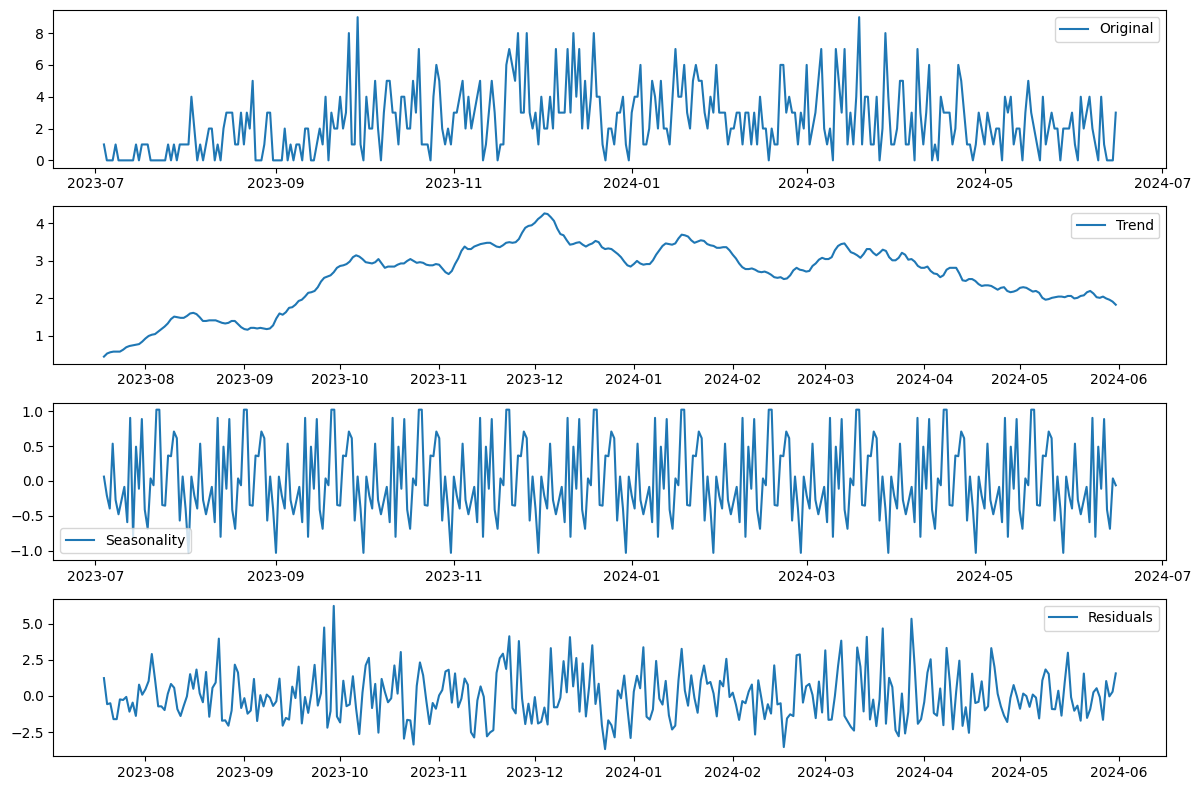

In [91]:
# 1. Фильтруем только успешные сделки
successful_df = deals_df[deals_df['Stage'] == 'Payment Done']

# 2. Убеждаемся, что индекс — это datetime
successful_df.index = pd.to_datetime(successful_df.index)

# 3. Группируем по дням и считаем количество успешных сделок
daily_success_deals = successful_df.resample("D").count()['Id']  # Series

# 4. Разложение временного ряда (например, с месячной сезонностью)
decomposition = seasonal_decompose(daily_success_deals, model='additive', period=30)

# 5. Извлекаем компоненты
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 6. Визуализация
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_deals, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

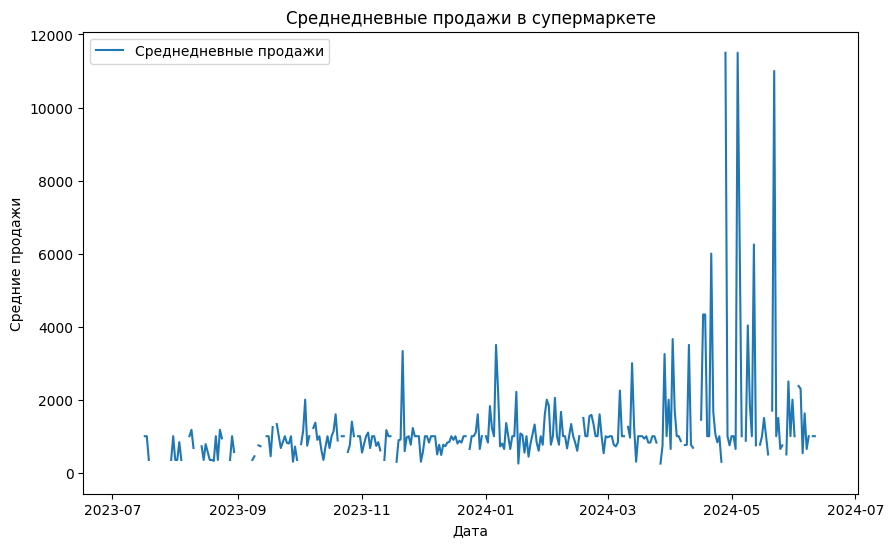

In [74]:
# Агрегируем продажи по дням и вычисляем среднее значение
daily_sales_mean = successful_df['Initial Amount Paid'].resample('D').mean()
# Постройте график среднедневных продаж
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_mean, label='Среднедневные продажи')
plt.title('Среднедневные продажи в супермаркете')
plt.xlabel('Дата')
plt.ylabel('Средние продажи')
plt.legend()
plt.show()

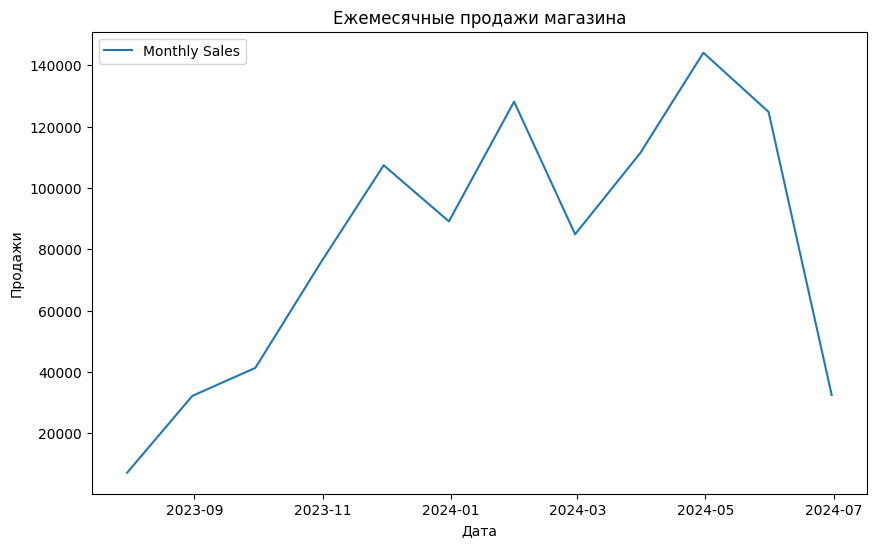

In [76]:
# Агрегируем продажи по месяцам
monthly_sales = successful_df['Initial Amount Paid'].resample('ME').sum()
# Постройте график продаж за месяц
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Ежемесячные продажи магазина')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

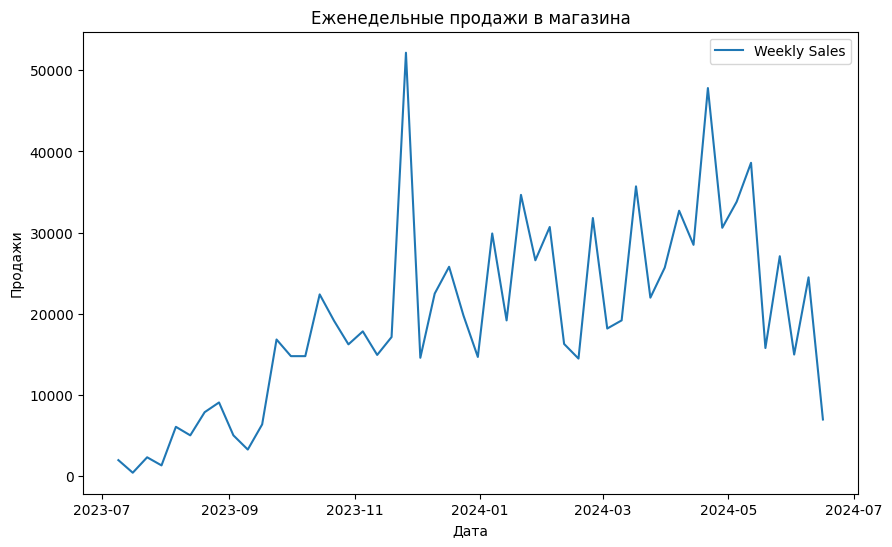

In [77]:
# Агрегирование продаж по неделям
weekly_sales = successful_df['Initial Amount Paid'].resample('W').sum()
# Постройте график недельных продаж
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Weekly Sales')
plt.title('Еженедельные продажи в магазина')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.show()

In [58]:
calls_df = pd.read_pickle("calls_cleaned_v1.pkl")
calls_df

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM,Call Data,Start Time Of Call,Call Duration Range
0,5805028000000805001,2023-06-30 08:43:00,John Doe,NaN,Inbound,171,Received,NaN,False,2023-06-30,08:43:00,1–3 min
1,5805028000000768006,2023-06-30 08:46:00,John Doe,NaN,Outbound,28,Attended Dialled,Completed,False,2023-06-30,08:46:00,15–60 sec
2,5805028000000764027,2023-06-30 08:59:00,John Doe,NaN,Outbound,24,Attended Dialled,Completed,False,2023-06-30,08:59:00,15–60 sec
3,5805028000000787003,2023-06-30 09:20:00,John Doe,5805028000000645014,Outbound,6,Attended Dialled,Completed,False,2023-06-30,09:20:00,3–15 sec
4,5805028000000768019,2023-06-30 09:30:00,John Doe,5805028000000645014,Outbound,11,Attended Dialled,Completed,False,2023-06-30,09:30:00,3–15 sec
...,...,...,...,...,...,...,...,...,...,...,...,...
95869,5805028000056889515,2024-06-21 15:30:00,Ulysses Adams,5805028000056564231,Outbound,6,Attended Dialled,Completed,False,2024-06-21,15:30:00,3–15 sec
95870,5805028000056875317,2024-06-21 15:30:00,Victor Barnes,5805028000054867023,Outbound,8,Attended Dialled,Completed,False,2024-06-21,15:30:00,3–15 sec
95871,5805028000056832495,2024-06-21 15:30:00,Kevin Parker,5805028000010617278,Outbound,5,Attended Dialled,Completed,False,2024-06-21,15:30:00,3–15 sec
95872,5805028000056893619,2024-06-21 15:30:00,Victor Barnes,5805028000056839048,Outbound,0,Unattended Dialled,Completed,False,2024-06-21,15:30:00,0 sec


In [59]:
calls_df.dtypes

Id                                    object
Call Start Time               datetime64[ns]
Call Owner Name                       object
CONTACTID                             object
Call Type                           category
Call Duration (in seconds)             Int64
Call Status                         category
Outgoing Call Status                category
Scheduled in CRM                     boolean
Call Data                     datetime64[ns]
Start Time Of Call                    object
Call Duration Range                 category
dtype: object

In [60]:
calls_df = calls_df.set_index('Call Start Time')

In [78]:
# Явное условие фильтрации
filtered_calls_df = calls_df[
    (calls_df['Call Duration Range'] != '0 sec') &
    (calls_df['Call Duration Range'] != '1–3 sec')
]

In [86]:
inbound_filtered_calls_df = filtered_calls_df[filtered_calls_df['Call Type'] == 'Inbound']

In [97]:
outbound_filtered_calls_df = filtered_calls_df[filtered_calls_df['Call Type'] == 'Outbound']

In [103]:
outbound_filtered_calls_df['Call Type'].nunique()

1

In [102]:
inbound_filtered_calls_df['Call Type'].nunique()

1

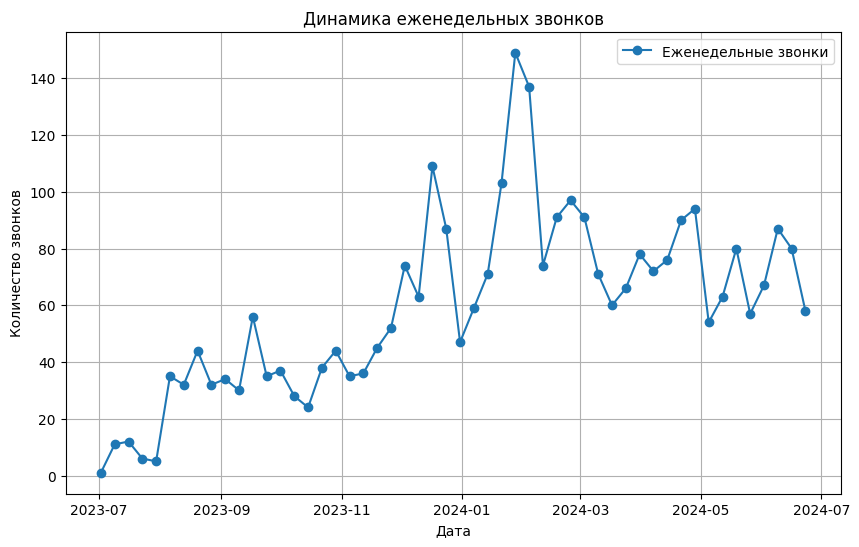

In [89]:
# Агрегирование продаж по неделям
# Если есть колонка с датой и она в индексе, то просто считаем строки (звонки) по неделям:
weekly_in_calls = inbound_filtered_calls_df.resample('W').size()

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(weekly_in_calls.index, weekly_in_calls.values, marker='o', label='Еженедельные звонки')
plt.title('Динамика еженедельных звонков')
plt.xlabel('Дата')
plt.ylabel('Количество звонков')
plt.grid(True)
plt.legend()
plt.show()

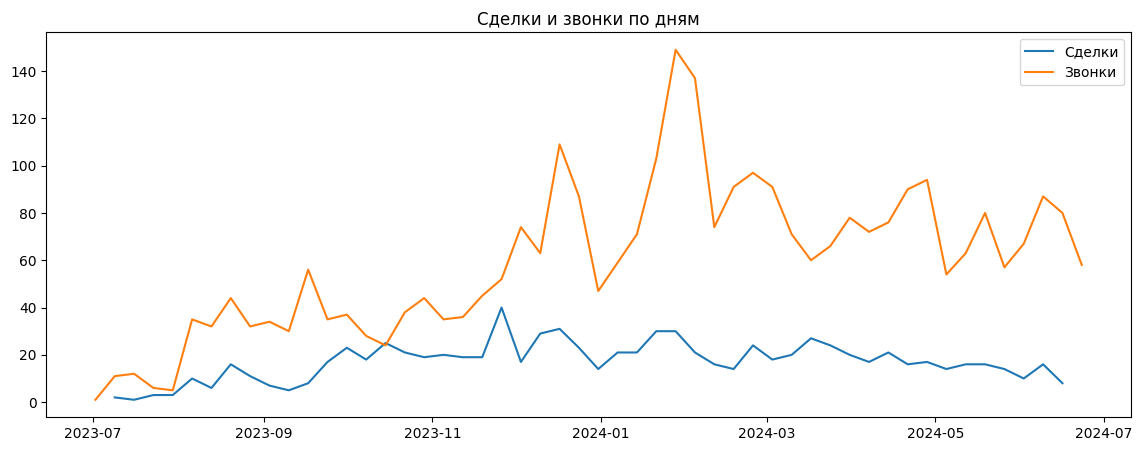

In [95]:
# 3. Группируем по неделям и считаем количество успешных сделок
weekly_success_deals = successful_df.resample("W").count()['Id']  # Series

plt.figure(figsize=(14, 5))
plt.plot(weekly_success_deals, label='Сделки')
plt.plot(weekly_in_calls, label='Звонки')
plt.title("Сделки и звонки по дням")
plt.legend()
plt.show()

In [96]:
# Объединяем данные по дате
correlation_df = pd.DataFrame({
    'calls': weekly_in_calls,
    'deals': weekly_success_deals
}).dropna()

# Считаем коэффициент корреляции Пирсона
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: {correlation:.3f}")

Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: 0.524


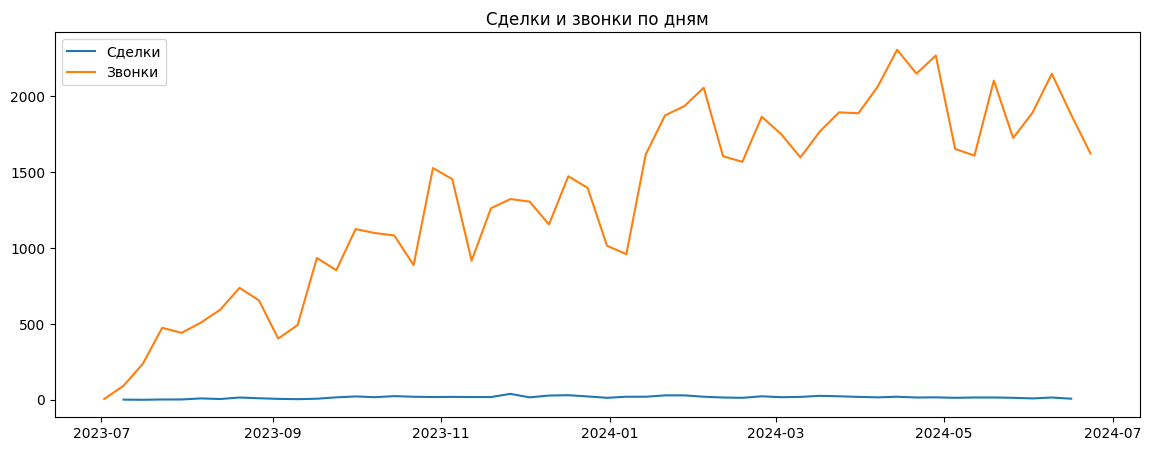

In [98]:
# 3. Группируем по неделям и считаем количество успешных сделок
# weekly_success_deals = successful_df.resample("W").count()['Id']  # Series
weekly_out_calls = outbound_filtered_calls_df.resample('W').size()

plt.figure(figsize=(14, 5))
plt.plot(weekly_success_deals, label='Сделки')
plt.plot(weekly_out_calls, label='Звонки')
plt.title("Сделки и звонки по дням")
plt.legend()
plt.show()

In [99]:
# Объединяем данные по дате
correlation_df = pd.DataFrame({
    'calls': weekly_out_calls,
    'deals': weekly_success_deals
}).dropna()

# Считаем коэффициент корреляции Пирсона
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: {correlation:.3f}")

Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: 0.506


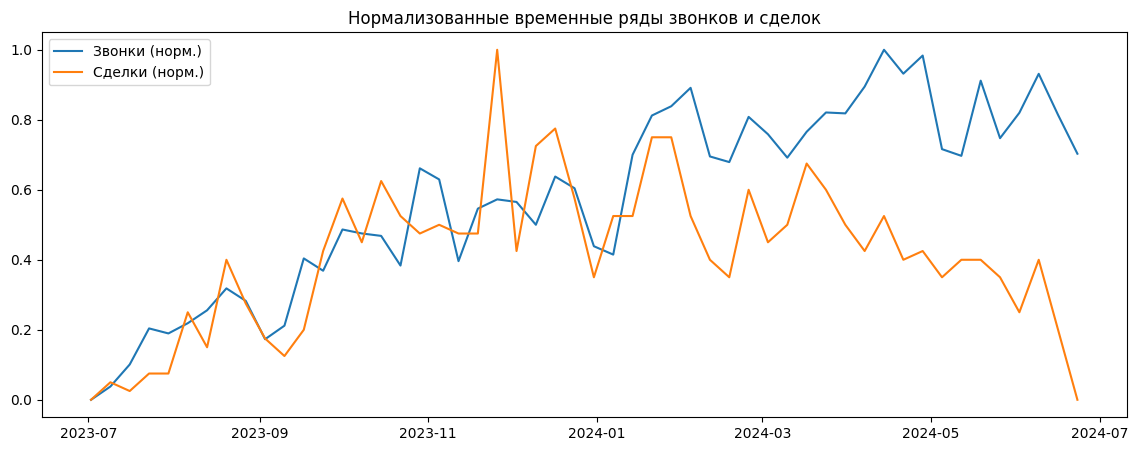

In [105]:
#  1. Нормализация рядов (MinMax Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(pd.DataFrame({
    'calls': weekly_out_calls,
    'deals': weekly_success_deals
}).fillna(0))

scaled_df = pd.DataFrame(scaled, index=weekly_out_calls.index, columns=['calls', 'deals'])

# График
plt.figure(figsize=(14, 5))
plt.plot(scaled_df['calls'], label='Звонки (норм.)')
plt.plot(scaled_df['deals'], label='Сделки (норм.)')
plt.title("Нормализованные временные ряды звонков и сделок")
plt.legend()
plt.show()

In [106]:
# 1. Фильтруем только потерянные сделки
lost_df = deals_df[deals_df['Stage'] == 'Lost']

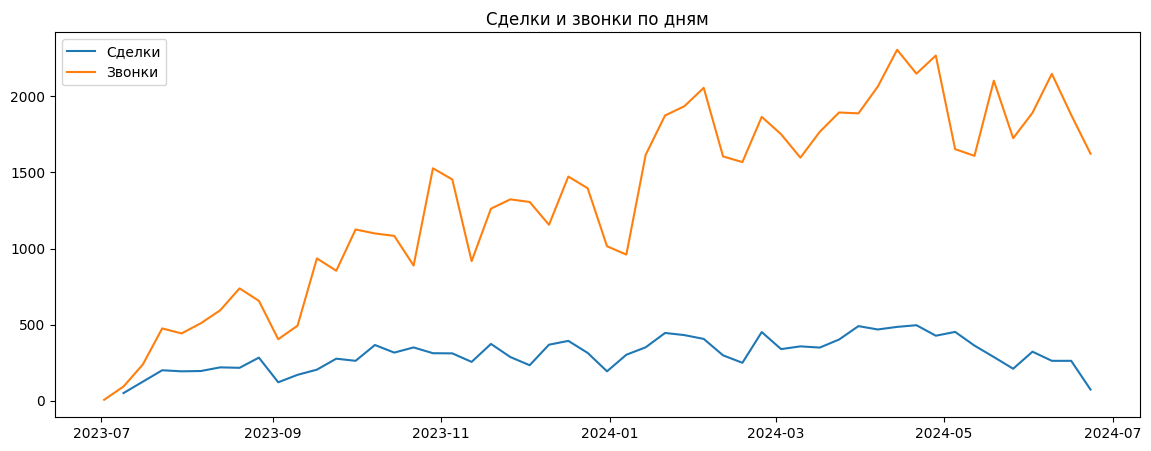

In [108]:

weekly_lost_deals = lost_df.resample("W").count()['Id']  # Series

plt.figure(figsize=(14, 5))
plt.plot(weekly_lost_deals, label='Сделки')
plt.plot(weekly_out_calls, label='Звонки')
plt.title("Сделки и звонки по дням")
plt.legend()
plt.show()

In [109]:
# Объединяем данные по дате
correlation_df = pd.DataFrame({
    'calls': weekly_out_calls,
    'deals': weekly_lost_deals
}).dropna()

# Считаем коэффициент корреляции Пирсона
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: {correlation:.3f}")

Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: 0.716


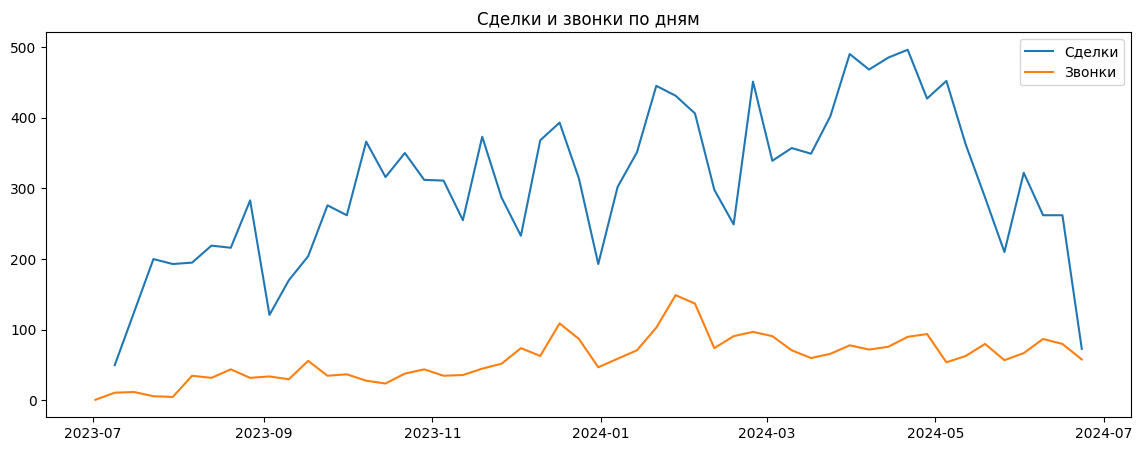

In [110]:

plt.figure(figsize=(14, 5))
plt.plot(weekly_lost_deals, label='Сделки')
plt.plot(weekly_in_calls, label='Звонки')
plt.title("Сделки и звонки по дням")
plt.legend()
plt.show()

In [111]:
# Объединяем данные по дате
correlation_df = pd.DataFrame({
    'calls': weekly_in_calls,
    'deals': weekly_lost_deals
}).dropna()

# Считаем коэффициент корреляции Пирсона
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: {correlation:.3f}")

Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: 0.601


In [115]:
open_deals_df = deals_df[deals_df['Closing Date'].isna()]

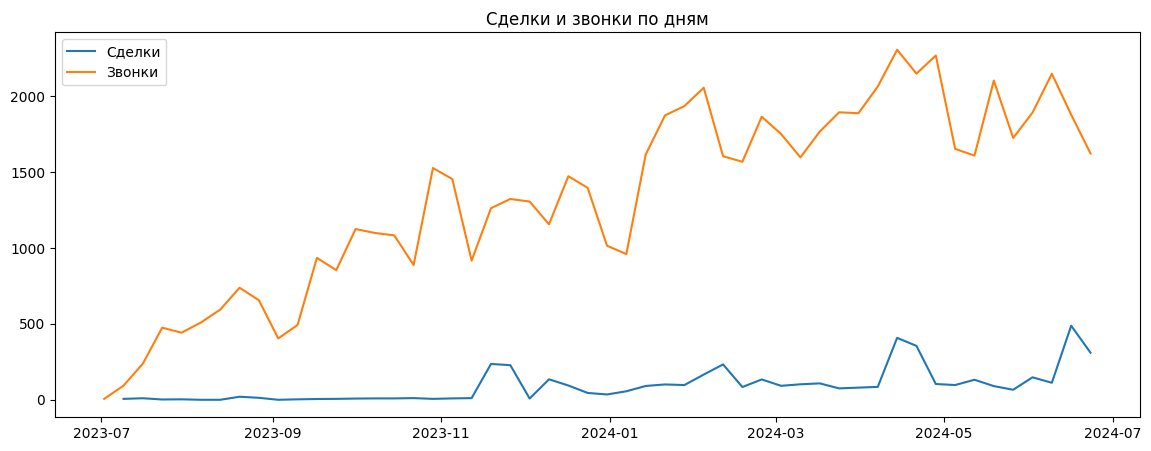

In [117]:

weekly_process_deals = open_deals_df.resample("W").count()['Id']  # Series

plt.figure(figsize=(14, 5))
plt.plot(weekly_process_deals, label='Сделки')
plt.plot(weekly_out_calls, label='Звонки')
plt.title("Сделки и звонки по дням")
plt.legend()
plt.show()

In [118]:
# Объединяем данные по дате
correlation_df = pd.DataFrame({
    'calls': weekly_out_calls,
    'deals': weekly_process_deals
}).dropna()

# Считаем коэффициент корреляции Пирсона
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: {correlation:.3f}")

Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: 0.595


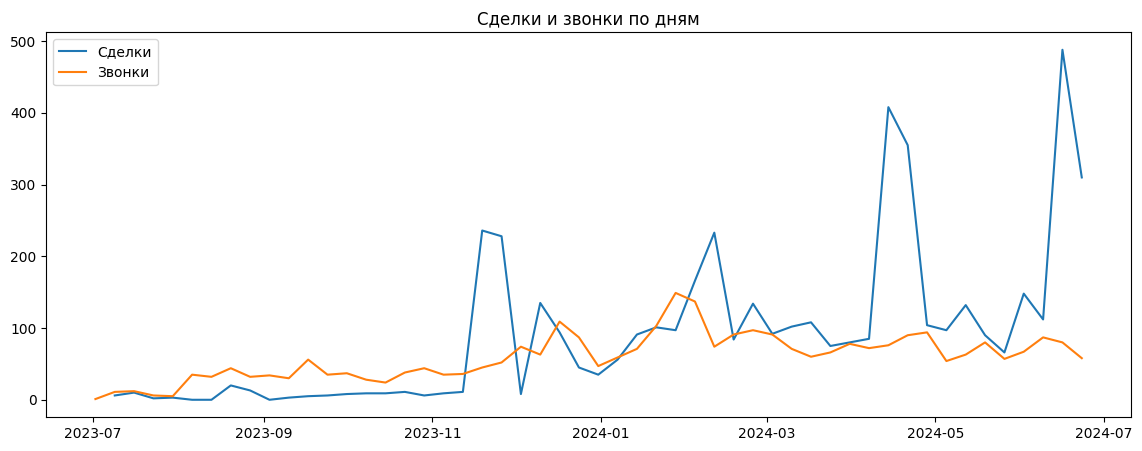

In [119]:
plt.figure(figsize=(14, 5))
plt.plot(weekly_process_deals, label='Сделки')
plt.plot(weekly_in_calls, label='Звонки')
plt.title("Сделки и звонки по дням")
plt.legend()
plt.show()

In [120]:
# Объединяем данные по дате
correlation_df = pd.DataFrame({
    'calls': weekly_in_calls,
    'deals': weekly_process_deals
}).dropna()

# Считаем коэффициент корреляции Пирсона
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: {correlation:.3f}")

Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: 0.444


C:\Users\user\AppData\Local\Temp\ipykernel_16212\1363578710.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_calls = daily_calls.resample('M').sum()   # или .mean()
C:\Users\user\AppData\Local\Temp\ipykernel_16212\1363578710.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_deals = daily_deals.resample('M').sum()   # или .mean()


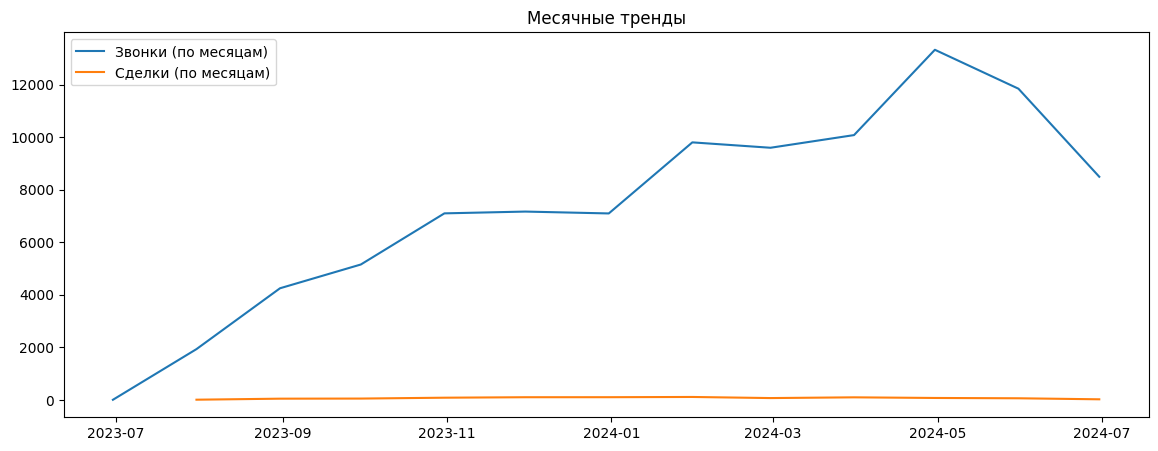

In [121]:
# Агрегирование продаж по неделям
weekly_sales = successful_df['Initial Amount Paid'].resample('W').sum()

monthly_calls = daily_calls.resample('M').sum()   # или .mean()
monthly_deals = daily_deals.resample('M').sum()   # или .mean()

plt.figure(figsize=(14, 5))
plt.plot(monthly_calls, label='Звонки (по месяцам)')
plt.plot(monthly_deals, label='Сделки (по месяцам)')
plt.title("Месячные тренды")
plt.legend()
plt.show()

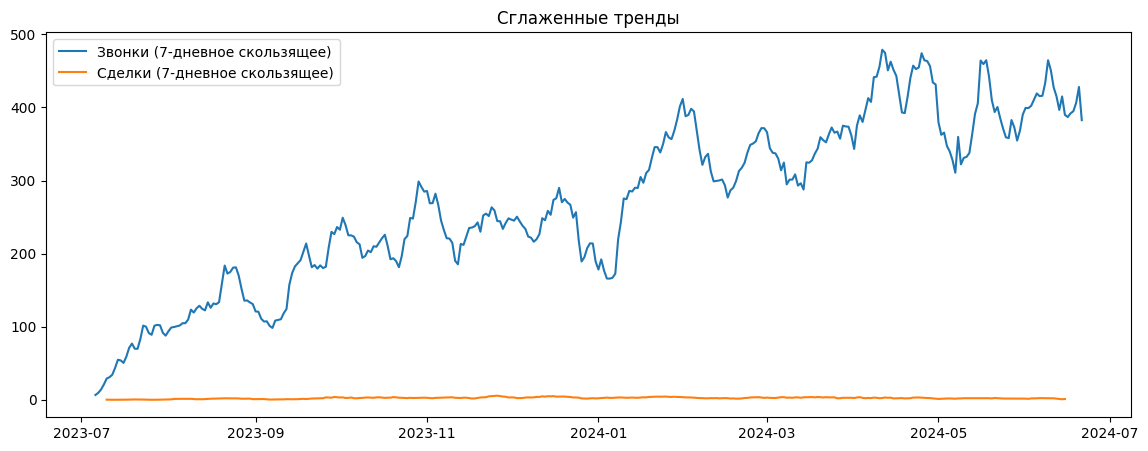

In [123]:
daily_calls_smooth = daily_calls.rolling(7).mean()
daily_deals_smooth = daily_deals.rolling(7).mean()

plt.figure(figsize=(14, 5))
plt.plot(daily_calls_smooth, label='Звонки (7-дневное скользящее)')
plt.plot(daily_deals_smooth, label='Сделки (7-дневное скользящее)')
plt.title("Сглаженные тренды")
plt.legend()
plt.show()

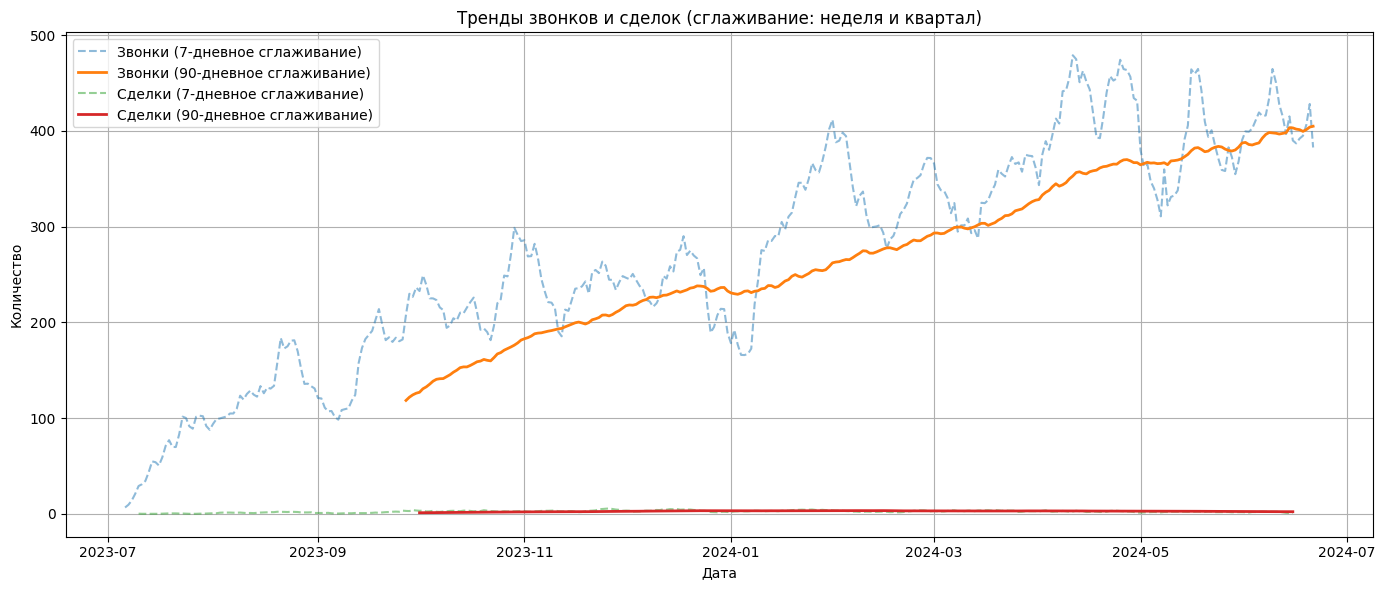

In [130]:
# Сглаживание: 7 и 90 дней
calls_smooth_7 = daily_calls.rolling(7).mean()
calls_smooth_90 = daily_calls.rolling(90).mean()

deals_smooth_7 = daily_deals.rolling(7).mean()
deals_smooth_90 = daily_deals.rolling(90).mean()

# Построение графика
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Звонки
plt.plot(calls_smooth_7, label='Звонки (7-дневное сглаживание)', alpha=0.5, linestyle='--')
plt.plot(calls_smooth_90, label='Звонки (90-дневное сглаживание)', linewidth=2)

# Сделки
plt.plot(deals_smooth_7, label='Сделки (7-дневное сглаживание)', alpha=0.5, linestyle='--')
plt.plot(deals_smooth_90, label='Сделки (90-дневное сглаживание)', linewidth=2)

plt.title("Тренды звонков и сделок (сглаживание: неделя и квартал)")
plt.xlabel("Дата")
plt.ylabel("Количество")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
# Исключаем звонки с длительностью '0 sec' и '1–3 sec'
# Явное условие фильтрации
filtered_calls_df = calls_df[
    (calls_df['Call Duration Range'] != '0 sec') &
    (calls_df['Call Duration Range'] != '1–3 sec')
]

# Группируем по дате
daily_filtered_calls = filtered_calls_df.groupby(filtered_calls_df.index..date).size()
# daily_filtered_calls.index = pd.to_datetime(daily_filtered_calls.index)

In [73]:
# Объединяем данные по дате
correlation_df = pd.DataFrame({
    'calls': daily_filtered_calls,
    'deals': daily_deals
}).dropna()

# Считаем коэффициент корреляции Пирсона
correlation = correlation_df['calls'].corr(correlation_df['deals'], method='pearson')

print(f"Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: {correlation:.3f}")

Коэффициент корреляции Пирсона между звонками (>3 сек) и сделками: 0.393


In [ ]:
Если correlation > 0.5 — можно сказать, что связь заметная.

Если 0.2 < correlation < 0.5 — слабая, но может быть важна при других условиях.

Если < 0.2 — скорее всего, звонки и сделки не сильно связаны напрямую (в том числе по времени).

## 2. Изучите распределение времени закрытия сделок и продолжительность периода от создания до закрытия.

In [132]:
close_deals_df = deals_df[deals_df['Closing Date'].notna()]

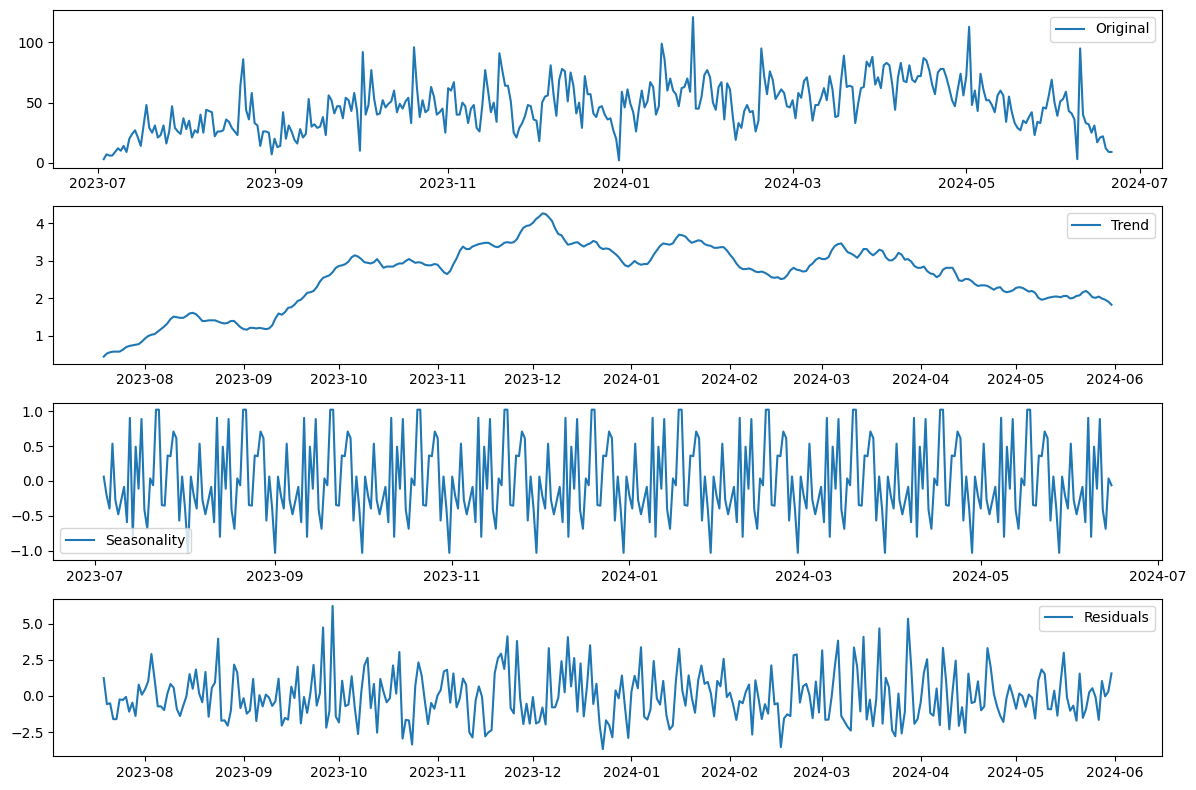

In [133]:
# 2. Агрегируем: считаем количество сделок в каждый день
daily_close_deals = close_deals_df.resample("D").size()  # временной ряд по дням
# 3. Разложение временного ряда (период — 7, если думаем, что есть недельная сезонность)
decomposition = seasonal_decompose(daily_deals, model='additive', period=30)

# 4. Извлекаем компоненты
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 5. Визуализация (как в твоём учебном примере)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_close_deals, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

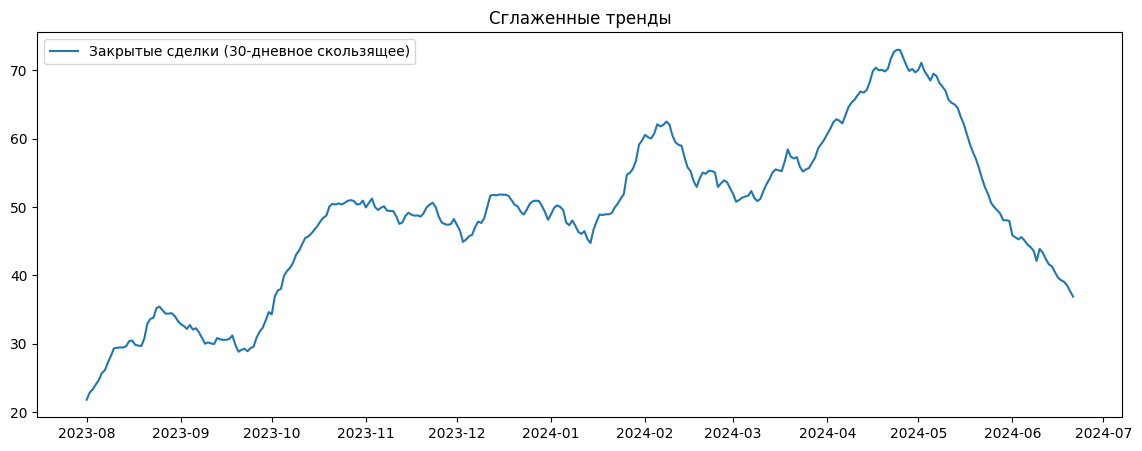

In [138]:
# monthly_close_deals = close_deals_df.resample("ME").size()

monthly_close_deals_smooth = daily_close_deals.rolling(30).mean()

plt.figure(figsize=(14, 5))
plt.plot(monthly_close_deals_smooth, label='Закрытые сделки (30-дневное скользящее)')
plt.title("Сглаженные тренды")
plt.legend()
plt.show()

In [ ]:
daily_success_deals

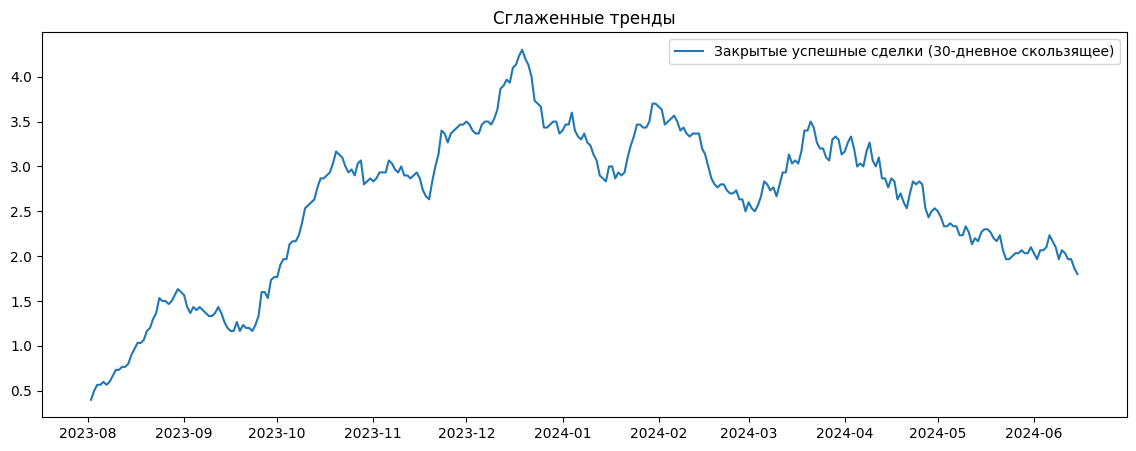

In [139]:
monthly_suc_close_deals_smooth = daily_success_deals.rolling(30).mean()

plt.figure(figsize=(14, 5))
plt.plot(monthly_suc_close_deals_smooth, label='Закрытые успешные сделки (30-дневное скользящее)')
plt.title("Сглаженные тренды")
plt.legend()
plt.show()

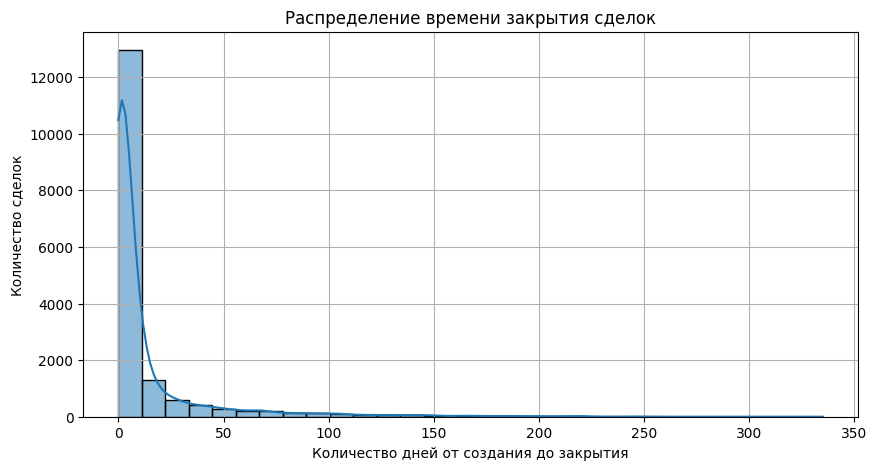

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(deals_df['Create_to_Close_Days'].dropna(), bins=30, kde=True)
plt.title("Распределение времени закрытия сделок")
plt.xlabel("Количество дней от создания до закрытия")
plt.ylabel("Количество сделок")
plt.grid(True)
plt.show()

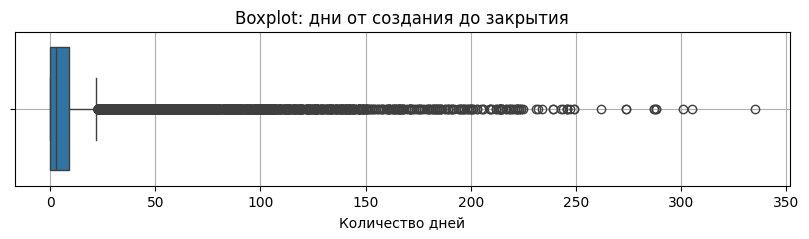

In [141]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=deals_df['Create_to_Close_Days'].dropna())
plt.title("Boxplot: дни от создания до закрытия")
plt.xlabel("Количество дней")
plt.grid(True)
plt.show()

In [143]:
import numpy as np
deals_df['Create_to_Close_Days_log'] = np.log1p(deals_df['Create_to_Close_Days'])

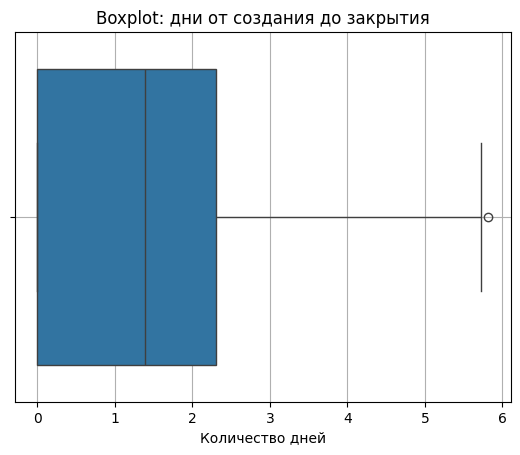

In [144]:
sns.boxplot(x=deals_df['Create_to_Close_Days_log'].dropna())
plt.title("Boxplot: дни от создания до закрытия")
plt.xlabel("Количество дней")
plt.grid(True)
plt.show()

In [154]:
# Фильтруем только успешные сделки
payment_done_df = deals_df[deals_df['Stage'] == 'Payment Done']

In [155]:
payment_done_df

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range,Create_to_Close_Days_log
Created Time,,,,,,,,,,,,,,,,,,,,,
2023-07-04 10:11:00,5805028000000947046,Oliver Taylor,2023-07-12,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_DE,71 days 00:46:22,b3,...,11,1000.0,11000.0,5805028000000939010,Hamburg,NaN,2023-07-04,8.0,Very slow (>60 min),2.197225
2023-07-08 08:56:00,5805028000001401001,Oliver Taylor,2023-07-16,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_DE,0 days 02:22:36,b3,...,8,1000.0,11500.0,5805028000001350049,NaN,NaN,2023-07-08,8.0,Very slow (>60 min),2.197225
2023-07-15 13:27:00,5805028000001885076,Jane Smith,2023-08-31,A - High,Payment Done,NaN,eng/digital-marketing,04.07.23recentlymoved_DE,0 days 00:13:31,b2,...,11,450.0,4000.0,5805028000001880249,Ingolstadt,NaN,2023-07-15,47.0,Fast (5-15 min),3.871201
2023-07-17 18:02:00,5805028000001987082,Julia Nelson,2023-07-17,C - Low,Payment Done,Conditions are not suitable,eng/digital-marketing,12.07.2023wide_DE,0 days 00:49:16,v3com,...,11,1000.0,11000.0,5805028000001986077,NaN,B1,2023-07-17,0.0,Slow (30-60 min),0.000000
2023-07-18 21:11:00,5805028000002302112,Julia Nelson,2023-07-19,C - Low,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,0 days 15:24:52,_{region_name}_,...,2,1000.0,5000.0,5805028000002302109,Wolfsburg,B1,2023-07-18,1.0,Very slow (>60 min),0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10 15:33:00,5805028000054257317,Quincy Vincent,2024-06-17,B - Medium,Payment Done,NaN,/eng,02.07.23wide_DE,0 days 00:45:55,bloggersvideo16com,...,1,1000.0,11000.0,5805028000054284461,Leinfelden-Echterdingen,B1,2024-06-10,7.0,Slow (30-60 min),2.079442
2024-06-11 19:39:00,5805028000054664018,Ben Hall,2024-06-19,D - Non Target,Payment Done,NaN,/eng,NaN,0 days 16:31:52,NaN,...,1,1000.0,9000.0,5805028000054683001,Zwickau,A2,2024-06-11,8.0,Very slow (>60 min),2.197225
2024-06-15 12:20:00,5805028000055524040,Ben Hall,2024-06-23,B - Medium,Payment Done,NaN,/eng,Live_DE,0 days 00:23:42,b0,...,1,1000.0,9000.0,5805028000055464156,Wolfsburg,B1,2024-06-15,8.0,Medium (15-30 min),2.197225


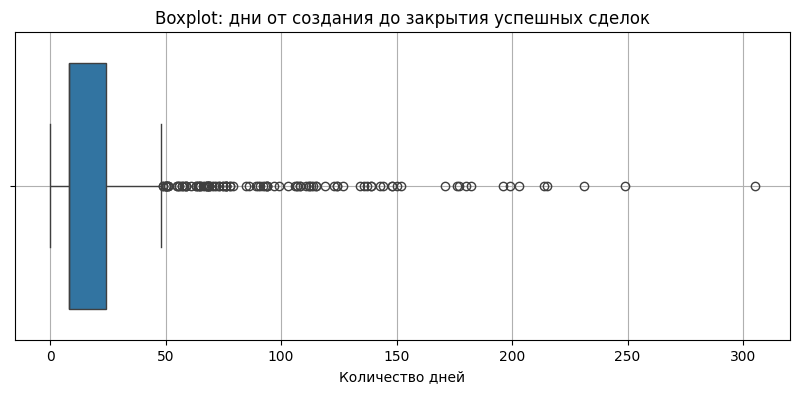

In [146]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=successful_df['Create_to_Close_Days'].dropna())
plt.title("Boxplot: дни от создания до закрытия успешных сделок")
plt.xlabel("Количество дней")
plt.grid(True)
plt.show()

In [152]:
print(successful_df.index.duplicated().sum())

8


In [159]:
df_tmp

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Created Date,Create_to_Close_Days,SLA_range
0,5805028000000947046,Oliver Taylor,2023-07-12,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_DE,71 days 00:46:22,b3,...,11,11,1000.0,11000.0,5805028000000939010,Hamburg,NaN,2023-07-04,8.0,Very slow (>60 min)
1,5805028000001401001,Oliver Taylor,2023-07-16,B - Medium,Payment Done,NaN,eng/digital-marketing,02.07.23wide_DE,0 days 02:22:36,b3,...,11,8,1000.0,11500.0,5805028000001350049,NaN,NaN,2023-07-08,8.0,Very slow (>60 min)
2,5805028000001885076,Jane Smith,2023-08-31,A - High,Payment Done,NaN,eng/digital-marketing,04.07.23recentlymoved_DE,0 days 00:13:31,b2,...,11,11,450.0,4000.0,5805028000001880249,Ingolstadt,NaN,2023-07-15,47.0,Fast (5-15 min)
3,5805028000001987082,Julia Nelson,2023-07-17,C - Low,Payment Done,Conditions are not suitable,eng/digital-marketing,12.07.2023wide_DE,0 days 00:49:16,v3com,...,11,11,1000.0,11000.0,5805028000001986077,NaN,B1,2023-07-17,0.0,Slow (30-60 min)
4,5805028000002302112,Julia Nelson,2023-07-19,C - Low,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,0 days 15:24:52,_{region_name}_,...,6,2,1000.0,5000.0,5805028000002302109,Wolfsburg,B1,2023-07-18,1.0,Very slow (>60 min)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,5805028000054257317,Quincy Vincent,2024-06-17,B - Medium,Payment Done,NaN,/eng,02.07.23wide_DE,0 days 00:45:55,bloggersvideo16com,...,11,1,1000.0,11000.0,5805028000054284461,Leinfelden-Echterdingen,B1,2024-06-10,7.0,Slow (30-60 min)
854,5805028000054664018,Ben Hall,2024-06-19,D - Non Target,Payment Done,NaN,/eng,NaN,0 days 16:31:52,NaN,...,6,1,1000.0,9000.0,5805028000054683001,Zwickau,A2,2024-06-11,8.0,Very slow (>60 min)
855,5805028000055524040,Ben Hall,2024-06-23,B - Medium,Payment Done,NaN,/eng,Live_DE,0 days 00:23:42,b0,...,6,1,1000.0,9000.0,5805028000055464156,Wolfsburg,B1,2024-06-15,8.0,Medium (15-30 min)
856,5805028000055524315,Ben Hall,2024-06-19,A - High,Payment Done,NaN,/eng,12.07.2023wide_DE,0 days 00:17:25,bloggersvideo11,...,11,1,500.0,4500.0,5805028000055503302,Zinnowitz,NaN,2024-06-15,4.0,Medium (15-30 min)


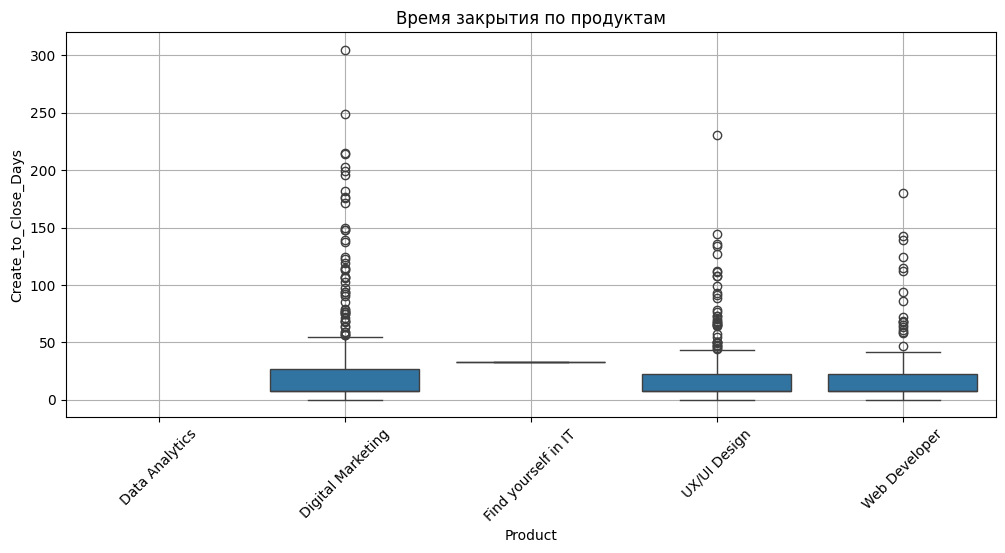

In [158]:
df_tmp = successful_df.reset_index(drop=True) # сбросить индекс и удалить старый (дату) из столбцов
plt.figure(figsize=(12, 5))
sns.boxplot(x='Product', y='Create_to_Close_Days', data=df_tmp.dropna(subset=['Create_to_Close_Days']))
plt.title("Время закрытия по продуктам")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

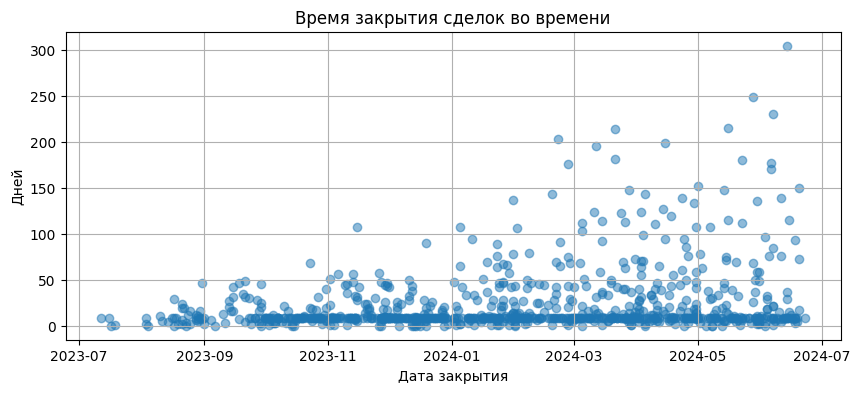

In [160]:
plt.figure(figsize=(10, 4))
plt.scatter(successful_df['Closing Date'], df_tmp['Create_to_Close_Days'], alpha=0.5)
plt.title("Время закрытия сделок во времени")
plt.xlabel("Дата закрытия")
plt.ylabel("Дней")
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16212\227898456.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_tmp.pivot_table(


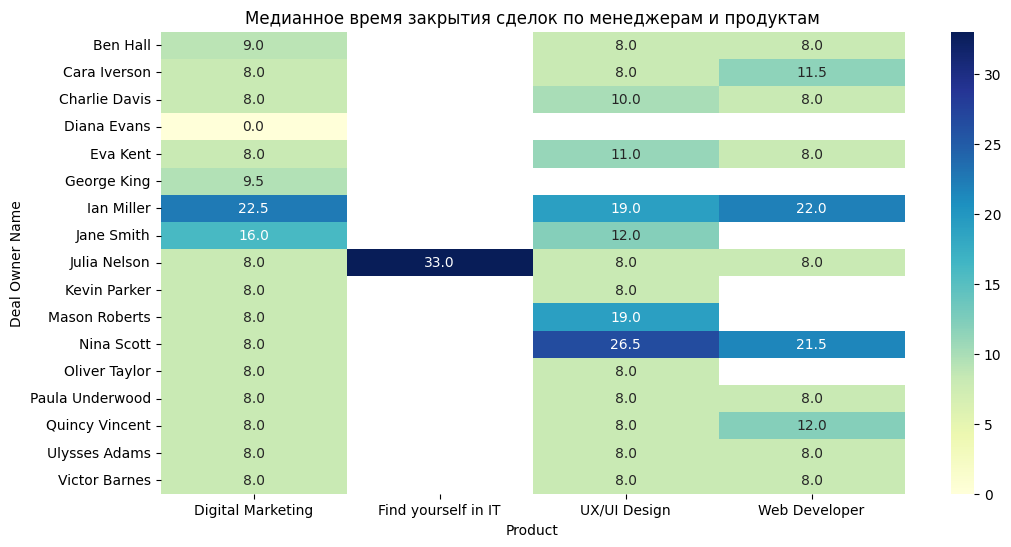

In [161]:
pivot = df_tmp.pivot_table(
    index='Deal Owner Name',
    columns='Product',
    values='Create_to_Close_Days',
    aggfunc='median'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Медианное время закрытия сделок по менеджерам и продуктам")
plt.show()